In [ ]:
!git clone https://github.com/niyaryca/Idiomacity-Detection.git

Cloning into 'Idiomacity-Detection'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 95 (delta 43), reused 39 (delta 17), pack-reused 0
Unpacking objects: 100% (95/95), done.


# **Exploratory Data Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Zero Shot Training Data**

In [ ]:
train_data = pd.read_csv("Idiomacity-Detection/Rawdata/train_zero_shot.csv")
train_data

,DataID,Language,MWE,Setting,Previous,Target,Next,Label
0,train_zero_shot.EN.168.1,EN,double dutch,zero_shot,This inspired others to jump ropes as a leisur...,There are several theories behind the origin o...,The most popular theory states that “Double Du...,0
1,train_zero_shot.EN.168.2,EN,double dutch,zero_shot,In the age of chivalry a man paid for the woma...,"Double Dutch also derives from the same era, D...",There are many phrases that include the word: ...,0
2,train_zero_shot.EN.168.3,EN,double dutch,zero_shot,"To her eternal credit, she kept both India and...",Since 1977 we have had a plethora of Foreign M...,We need to exclude from that list the late Mr ...,0
3,train_zero_shot.EN.168.4,EN,double dutch,zero_shot,While pharmaceutical companies were researchin...,Turns out that these people were speaking doub...,So why aren’t Big Macs sold all over the world...,0
4,train_zero_shot.EN.168.5,EN,double dutch,zero_shot,Coronavirus in Europe * Brexit * Brussels ...,Is Flemish premier talking double Dutch?,Three months before the Belgians take over the...,0
...,...,...,...,...,...,...,...,...
4486,train_zero_shot.PT.351.8,PT,gato-pingado,zero_shot,Era o ano de 1968.,"A estação de passageiros tranquila, com um ou...","Com os primeiros raios solares, o potente DC 8...",0
4487,train_zero_shot.PT.351.9,PT,gato-pingado,zero_shot,De acordo com informações vazadas de dentro da...,"Segundo a fonte, o programa vai seguir um form...","Leonardo fica inchado, perde a voz e vício mor...",0
4488,train_zero_shot.PT.351.10,PT,gato-pingado,zero_shot,O radialista Roberto Toledo apresentou o show ...,"""Eu fiquei sentado no chão e realmente só tinh...",Entre os poucos espectadores estava o advogado...,0
4489,train_zero_shot.PT.351.11,PT,gato-pingado,zero_shot,O carnaval em Goiânia também tem espaço para o...,"É o caso do bloco “Gato Pingado”, que reuniu c...","Segundo os organizadores, quando criaram o blo...",1


In [ ]:
null_value = train_data.loc[train_data['Next'].isnull()]
null_value

,DataID,Language,MWE,Setting,Previous,Target,Next,Label
870,train_zero_shot.EN.112.23,EN,nest egg,zero_shot,It just diminishes the desperation of relying ...,It is the one nest egg that can build that int...,NaN,0
1097,train_zero_shot.EN.266.18,EN,agony aunt,zero_shot,The TV star had previously revealed she has be...,She discussed her heartache while giving advic...,NaN,0


In [ ]:
train_data=train_data.dropna()

### **Language Column**

In [ ]:
english_train_data=train_data.loc[train_data['Language'] =='EN']
portuguese_train_data=train_data.loc[train_data['Language'] =='PT']

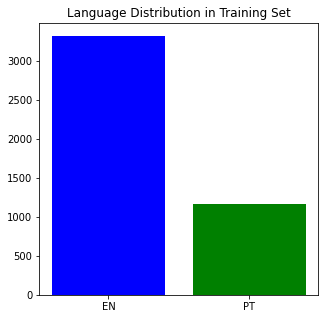



EN    3325
PT    1164
Name: Language, dtype: int64


In [ ]:
language_classes = train_data.Language.unique()
language_counts = []

for i in language_classes:
  count = len(train_data[train_data.Language==i])
  language_counts.append(count)

plt.figure(figsize=(5, 5))
plt.bar(language_classes,language_counts,color=['blue','green'])
plt.title("Language Distribution in Training Set")
plt.show()

print('\n')
print(train_data['Language'].value_counts())



0    2533
1    1956
Name: Label, dtype: int64


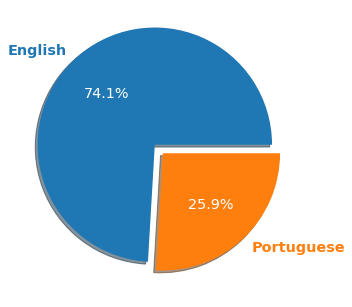

In [ ]:


explode = [0.1, 0]
fig, ax = plt.subplots(figsize=(5, 5))

patches, texts, pcts = ax.pie(
    language_counts, labels=['English','Portuguese'], autopct='%.1f%%',
    textprops={'size': 'x-large'}
    ,shadow=True,explode=explode)
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=1000)
# plt.title("Ratio of Idiomatic and Non-Idiomatic sentences")
plt.tight_layout()

print('\n')
print(train_data['Label'].value_counts())

`About 75% of the rows are in English at 3325 where as only 25% of it are in Portuguese at 1164`

---






### **Idioms or not?**



0    2533
1    1956
Name: Label, dtype: int64


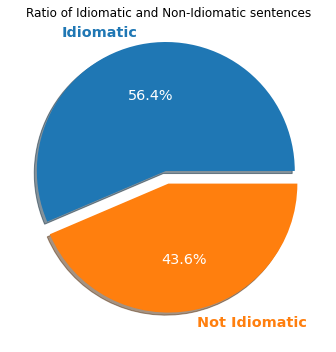

In [ ]:
idiomatic_classes = train_data.Label.unique()
idiomatic_counts = []

for i in idiomatic_classes:
  count = len(train_data[train_data.Label==i])
  idiomatic_counts.append(count)

explode = [0.1, 0]
fig, ax = plt.subplots(figsize=(5, 5))

patches, texts, pcts = ax.pie(
    idiomatic_counts, labels=['Idiomatic','Not Idiomatic'], autopct='%.1f%%',
    textprops={'size': 'x-large'}
    ,shadow=True,explode=explode)
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=1000)
plt.title("Ratio of Idiomatic and Non-Idiomatic sentences")
plt.tight_layout()

print('\n')
print(train_data['Label'].value_counts())

### **MWE Column**

In [ ]:
train_data['MWE'].value_counts().count()

236

In [ ]:
english_train_data['MWE'].value_counts().count()

163

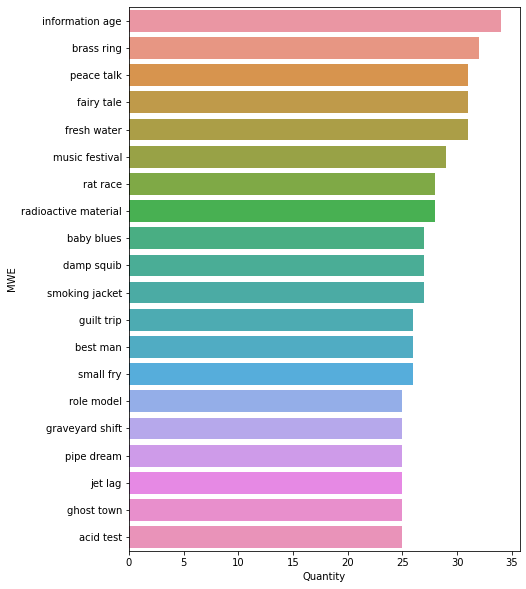

In [ ]:
# Groupby by country
mwe= english_train_data['MWE'].value_counts().rename_axis('MWE').reset_index(name='Quantity')
mwe_english = mwe
mwe=mwe.head(20)

plt.figure(figsize=(7,10))
sns.barplot(y='MWE',x='Quantity',data=mwe)


In [ ]:
list_english_mwe = mwe_english['MWE'].tolist()
one_list = []
zero_list=[]
for column in list_english_mwe:
  english_0 = english_train_data.loc[(english_train_data['MWE'] == column) & (english_train_data['Label'] ==0)]
  english_1 = english_train_data.loc[(english_train_data['MWE'] == column) & (english_train_data['Label'] ==1)]
  zero_list.append(len(english_0))
  one_list.append(len(english_1))

mwe_english["Idiomatic"] = zero_list
mwe_english['Non_Idiomatic'] = one_list
mwe_english

,MWE,Quantity,Idiomatic,Non_Idiomatic
0,information age,34,0,34
1,brass ring,32,17,15
2,peace talk,31,28,3
3,fairy tale,31,29,2
4,fresh water,31,0,31
...,...,...,...,...
158,copy cat,11,11,0
159,memory lane,11,8,3
160,crocodile tear,11,11,0
161,front runner,9,9,0


In [ ]:
import torch
import torch.nn.functional as F

a = torch.FloatTensor(mwe_english["Idiomatic"])

b = torch.FloatTensor(mwe_english["Non_Idiomatic"])
result = F.cosine_similarity(a, b, dim=0)

print(result)

tensor(0.1976)


In [ ]:
portuguese_train_data['MWE'].value_counts().count()

73

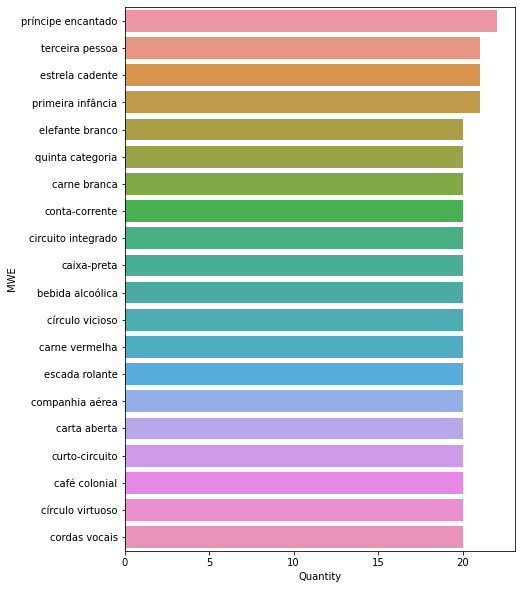

In [ ]:
mwe= portuguese_train_data['MWE'].value_counts().rename_axis('MWE').reset_index(name='Quantity')

mwe=mwe.head(20)

plt.figure(figsize=(7,10))
sns.barplot(y='MWE',x='Quantity',data=mwe)


## **One Shot Training Data**

In [ ]:
train_one_data = pd.read_csv("Idiomacity-Detection/Rawdata//train_one_shot.csv")
train_one_data

,DataID,Language,MWE,Setting,Previous,Target,Next,Label
0,train_one_shot.EN.147.1,EN,high life,one_shot,PSG ace Marquinhos owns this £170k Ferrari - b...,Despite having the riches to afford the high l...,In an interview with the French magazine 'So F...,1
1,train_one_shot.EN.183.1,EN,birth rate,one_shot,Demography expert Piotr Szukalski told Dzienni...,Minister of Family and Social Policy Marlena M...,Commenting on data the state agency Statistics...,1
2,train_one_shot.EN.213.1,EN,home run,one_shot,Negro Leagues Baseball Museum President Bob Ke...,So Aaron faced the same brutal racism other Bl...,This Black man in the deep South was about to ...,0
3,train_one_shot.EN.26.1,EN,public service,one_shot,The Nakayama Public Service Scholarship is par...,Program leaders said the scholarship defines p...,I think everyone can agree we need to do more ...,0
4,train_one_shot.EN.26.2,EN,public service,one_shot,He was absolutely right.”,"In the ensuing years, Wennberg might not have ...",Wennberg said he knew when he ran for his sixt...,1
...,...,...,...,...,...,...,...,...
135,train_one_shot.PT.293.1,PT,amigo oculto,one_shot,"Mesmo com a pandemia, é possível manter a trad...",Chegou o fim do ano e com ele as festas de Nat...,"Não tem jeito, essa é uma tradição brasileira.",0
136,train_one_shot.PT.293.2,PT,amigo oculto,one_shot,Secret Santa Generator : Secret Santa é o nome...,Esta é a versão do app semelhante ao Amigo Ocu...,Eles são análogos e funcionam exatamente da me...,1
137,train_one_shot.PT.284.1,PT,agente secreto,one_shot,"Já à meia-noite, o Domingo Maior exibe 3 Dias ...","Ethan Renner (Kevin Costner), veterano agente ...","Seu último desejo é reatar com sua filha, com ...",1
138,train_one_shot.PT.435.1,PT,sangue frio,one_shot,"Com a pele em chamas, o companheiro de Khen (P...","Irritado com a mentira, o líder desejará matar...","Assim, ele decidirá se livrar do escolhido e l...",0


In [ ]:
null_value = train_one_data.loc[train_one_data['Next'].isnull()]
null_value

,DataID,Language,MWE,Setting,Previous,Target,Next,Label


In [ ]:
train_one_data=train_one_data.dropna()

In [ ]:
train_one_data.MWE.value_counts()

sangue frio         2
dry land            2
closed book         2
bad hat             2
dream ticket        2
                   ..
critical review     1
middle school       1
goose egg           1
peace conference    1
entrance hall       1
Name: MWE, Length: 100, dtype: int64

### **Language Column**

In [ ]:
english_train_data1=train_one_data.loc[train_one_data['Language'] =='EN']
portuguese_train_data1=train_one_data.loc[train_one_data['Language'] =='PT']

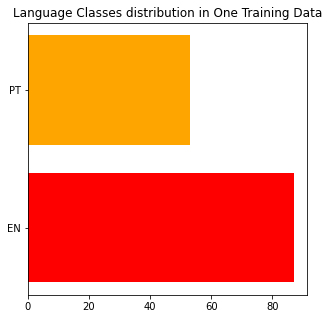



EN    87
PT    53
Name: Language, dtype: int64


In [ ]:
language_classes = train_one_data.Language.unique()
language_counts = []

for i in language_classes:
  count = len(train_one_data[train_one_data.Language==i])
  language_counts.append(count)

plt.figure(figsize=(5, 5))
plt.barh(language_classes,language_counts,color=['red','orange'])
plt.title("Language Classes distribution in One Training Data")
plt.show()

print('\n')
print(train_one_data['Language'].value_counts())

`About 62% of the rows are in English at 83 where as only 38% of it are in Portuguese at 53`

---






### **Idioms or not?**



1    80
0    60
Name: Label, dtype: int64


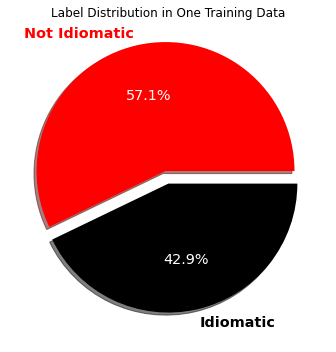

In [ ]:
idiomatic_classes = train_one_data.Label.unique()
idiomatic_counts = []

for i in idiomatic_classes:
  count = len(train_one_data[train_one_data.Label==i])
  idiomatic_counts.append(count)

explode = [0.1, 0]
fig, ax = plt.subplots(figsize=(5, 5))

patches, texts, pcts = ax.pie(
    idiomatic_counts, colors=['red', 'black'] ,labels=['Not Idiomatic','Idiomatic',], autopct='%.1f%%',
    textprops={'size': 'x-large'}
    ,shadow=True,explode=explode)
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())

plt.title("Label Distribution in One Training Data")
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=1000)
plt.tight_layout()

print('\n')
print(train_one_data['Label'].value_counts())

### **MWE Column**

In [ ]:
train_one_data['MWE'].value_counts().count()

100

In [ ]:
english_train_data1['MWE'].value_counts().count()

60

In [ ]:
portuguese_train_data1['MWE'].value_counts().count()

40

There are total of 100 MWE in the training data. 60 were in English and 40 were in Portuguese.

In [ ]:
mwe_label_grouped = train_one_data.groupby("MWE")["Label"]
both_label_mwe_df = mwe_label_grouped.filter(lambda x: len(x.value_counts())==2)
print("MWE with both non-idiomatic and idiomatic samples: "+ format(len(both_label_mwe_df)/2))

unique_labels_mwe_df = mwe_label_grouped.filter(lambda x: len(x.value_counts())==1)
zero_as_label_mwes = unique_labels_mwe_df[unique_labels_mwe_df==0]
one_as_label_mwes = unique_labels_mwe_df[unique_labels_mwe_df==1]
print("MWE with only non-idiomatic sample: " + format(len(one_as_label_mwes)))
print("MWE with only idiomatic sample: "+format(len(zero_as_label_mwes)))

MWE with both non-idiomatic and idiomatic samples: 40.0
MWE with only non-idiomatic sample: 40
MWE with only idiomatic sample: 20


*   It seems like there are 40 MWE which has both idiomatic and non-idiomatic samples.
*   MWE that has only non-idiomatic samples are about 40 and 20 have only idiomatic samples.



## **Dev Data**

In [ ]:
dev_data = pd.read_csv("Idiomacity-Detection/Rawdata/dev.csv")
dev_g_data = pd.read_csv("Idiomacity-Detection/Rawdata/dev_gold.csv")
dev_data = dev_data.merge(dev_g_data)
dev_data

,ID,Language,MWE,Previous,Target,Next,DataID,Label
0,3652,EN,high life,"Does the plumbing predictably rebel, creating ...",Are these interruptions of the good life a nec...,"Not at all , says James von Klemperer, preside...",dev.EN.147.1,1
1,11103,EN,high life,Let’s be honest – we would be chuffed if our b...,But for Australian fashion designer Abby Kheir...,"Speaking to the Daily Mail , the owner of Abys...",dev.EN.147.2,1
2,84346,EN,high life,I already have the winning ticket.,"With that, I will be enjoying the pleasures of...","Charles Selle is a former News-Sun reporter, p...",dev.EN.147.3,1
3,56279,EN,high life,"There were signs everywhere of cosy, comfortab...","Fendi offered swaddling, belted coats resembli...",Shawl collars and enveloping dressing-gown sty...,dev.EN.147.4,1
4,17886,EN,high life,Yet one thing is clear.,"Rick Ross and Diddy exemplify the high life, t...",And who knows -- maybe we'll see Puff on his a...,dev.EN.147.5,1
...,...,...,...,...,...,...,...,...
734,95336,PT,papel higiênico,"O presidente da Suzano Papel e Celulose, Walte...",A Suzano Papel e Celulose é uma das 10 maiores...,Vale destacar que a Suzano já recebeu menos en...,dev.PT.394.4,1
735,20353,PT,papel higiênico,"Atualmente, poderiam surgir problemas com carg...","O presidente da Suzano Papel e Celulose, Walte...",A Suzano Papel e Celulose é uma das 10 maiores...,dev.PT.394.5,1
736,54479,PT,papel higiênico,Policiais penais do Complexo Penitenciário Dr ...,O material entorpecente estava escondido em ro...,O flagrante ocorreu na manhã desta sexta-feira...,dev.PT.394.6,1
737,85941,PT,papel higiênico,O acidente ocorreu depois de fortes rajadas de...,"No caso do papel higiênico, a escassez de cont...","Schalka, da Suzano, teme que os problemas logí...",dev.PT.394.7,1


In [ ]:
null_value = dev_data.loc[dev_data['Next'].isnull()]
null_value

,ID,Language,MWE,Previous,Target,Next,DataID,Label


In [ ]:
dev_data=dev_data.dropna()

### **Language Column**

In [ ]:
english_data_d=dev_data.loc[dev_data['Language'] =='EN']
portuguese_data_d=dev_data.loc[dev_data['Language'] =='PT']

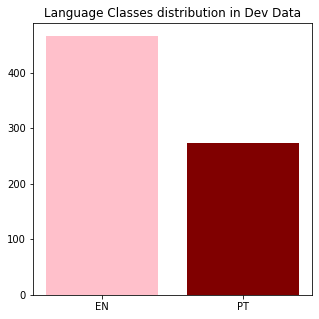



EN    466
PT    273
Name: Language, dtype: int64


In [ ]:
language_classes = dev_data.Language.unique()
language_counts = []

for i in language_classes:
  count = len(dev_data[dev_data.Language==i])
  language_counts.append(count)

plt.figure(figsize=(5,5))
plt.bar(language_classes,language_counts,color=['pink','maroon'])
plt.title("Language Classes distribution in Dev Data")
plt.show()

print('\n')
print(dev_data['Language'].value_counts())

`About 62% of the rows are in English at 83 where as only 38% of it are in Portuguese at 53`

---






### **Idioms or not?**



1    403
0    336
Name: Label, dtype: int64


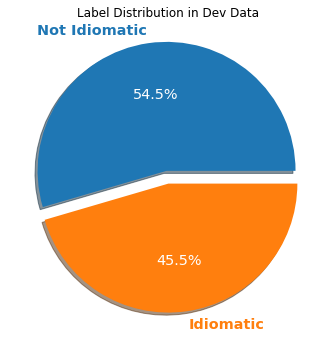

In [ ]:
idiomatic_classes = dev_data.Label.unique()
idiomatic_counts = []

for i in idiomatic_classes:
  count = len(dev_data[dev_data.Label==i])
  idiomatic_counts.append(count)

explode = [0.1, 0]
fig, ax = plt.subplots(figsize=(5,5))

patches, texts, pcts = ax.pie(
    idiomatic_counts, labels=['Not Idiomatic','Idiomatic',], autopct='%.1f%%',
    textprops={'size': 'x-large'}
    ,shadow=True,explode=explode)
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=1000)
plt.title("Label Distribution in Dev Data")

plt.tight_layout()

print('\n')
print(dev_data['Label'].value_counts())

### **MWE Column**

In [ ]:
dev_data['MWE'].value_counts().count()

50

In [ ]:
english_data_d['MWE'].value_counts().count()

30

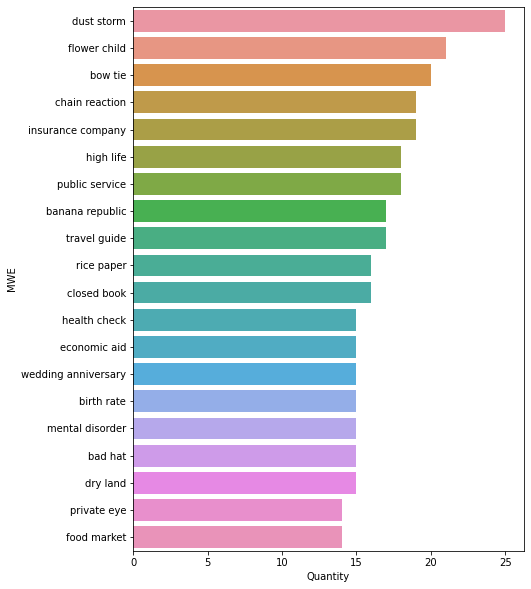

In [ ]:
mwe= english_data_d['MWE'].value_counts().rename_axis('MWE').reset_index(name='Quantity')

mwe=mwe.head(20)

plt.figure(figsize=(7,10))
sns.barplot(y='MWE',x='Quantity',data=mwe)


In [ ]:
portuguese_data_d['MWE'].value_counts().count()

20

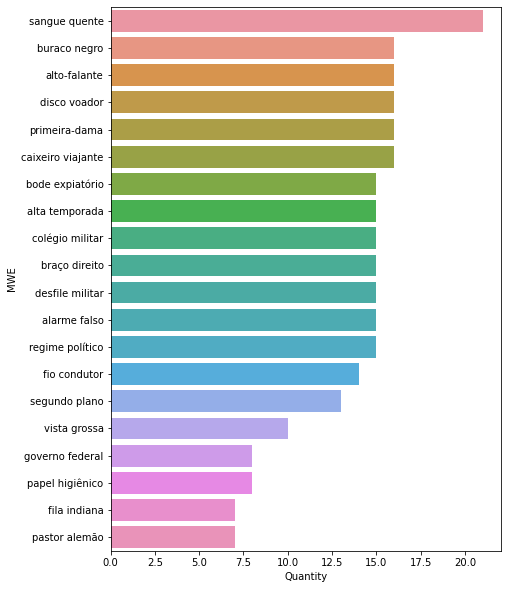

In [ ]:
mwe= portuguese_data_d['MWE'].value_counts().rename_axis('MWE').reset_index(name='Quantity')

mwe=mwe.head(20)

plt.figure(figsize=(7,10))
sns.barplot(y='MWE',x='Quantity',data=mwe)


There are total of 50 MWE in this dataset. 30 were in English and 20 were in Portuguese.

### **Comparision of Zero-Shot Training Data, One-Shot Training Data & Dev Data**

In [ ]:
zero_one = set(train_data.MWE) & set(train_one_data.MWE)
len(zero_one)

0

In [ ]:
zero_dev = set(train_data.MWE) & set(dev_data.MWE)
len(zero_dev)

0

In [ ]:
one_dev = set(train_one_data.MWE) & set(dev_data.MWE)
# one_dev
len(one_dev)

50

There is no overlapping of MWE in one-shot and zero-shot training data. Furthermore, all the MWE that are present in dev data are all present in one-shot data.